<a href="https://colab.research.google.com/github/thaohung13/Project.cuoi.ky.AI/blob/main/DETECT10FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/DATA2/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hong'):
    output = 0
  if file.startswith('Su'):
    output = 1
  if file.startswith('Sen'):
    output = 2
  if file.startswith('Mai'):
    output = 3
  if file.startswith('HaiDuong'):
    output = 4
  if file.startswith('HongMon'):
    output = 5
  if file.startswith('ThienDieu'):
    output = 6
  if file.startswith('CucVanTho'):
    output = 7
  if file.startswith('HuongDuong'):
    output = 8
  if file.startswith('DaUyenThao'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_PHOTOS4', photos)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_LABELS4', labels)

(1245, 128, 128, 3) (1245,)


In [161]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_PHOTOS4.npy')
labels = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_LABELS4.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [162]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (2,2), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (2,2), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_161 (Conv2D)         (None, 128, 128, 8)       224       
                                                                 
 conv2d_162 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_163 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 conv2d_164 (Conv2D)         (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                

In [163]:
x_train.shape

(996, 128, 128, 3)

In [164]:
y_train.shape

(996, 10)

In [165]:
# Training
batch_size=64
epochs=50   

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
eval = model.evaluate(x_test, y_test)
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Epoch 1/50
16/16 [==============================] - 2s 35ms/step - loss: 2.2307 - accuracy: 0.2420
Epoch 2/50
16/16 [==============================] - 0s 27ms/step - loss: 2.0189 - accuracy: 0.2821
Epoch 3/50
16/16 [==============================] - 0s 26ms/step - loss: 1.8114 - accuracy: 0.3574
Epoch 4/50
16/16 [==============================] - 0s 27ms/step - loss: 1.6199 - accuracy: 0.4197
Epoch 5/50
16/16 [==============================] - 0s 26ms/step - loss: 1.2879 - accuracy: 0.5412
Epoch 6/50
16/16 [==============================] - 0s 27ms/step - loss: 1.1264 - accuracy: 0.5974
Epoch 7/50
16/16 [==============================] - 0s 28ms/step - loss: 0.9207 - accuracy: 0.6757
Epoch 8/50
16/16 [==============================] - 0s 27ms/step - loss: 0.7426 - accuracy: 0.7319
Epoch 9/50
16/16 [==============================] - 0s 27ms/step - loss: 0.5336 - accuracy: 0.7932
Epoch 10/50
16/16 [==============================] - 0s 27ms/step - loss: 0.6435 - accuracy: 0.7791
Epoch 11/

In [166]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 0s 9ms/step - loss: 0.8831 - accuracy: 0.8554
Accuracy: 0.8554216623306274
Loss: 0.8830901980400085


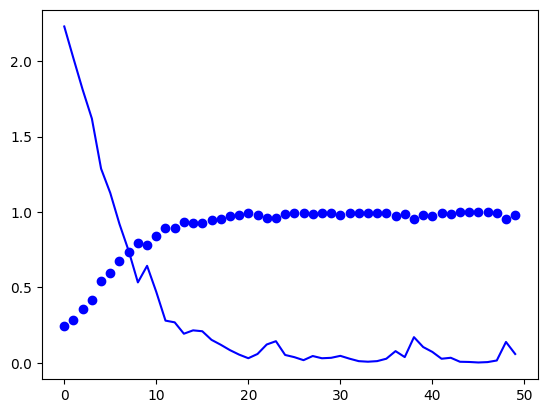

In [167]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [168]:
#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/FLOWER/MODEL_FLOWER4.h5')